<font color='blue'> **01 ____________________________________________________________________** </font>

70 110 54 86


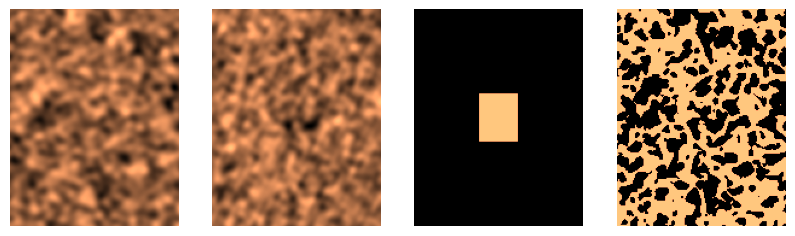

In [1]:
import gstools as gs ; import numpy as np ; import matplotlib.pyplot as plt ;import PyQt6;  dim = 2       #plt.plot(lithotypes);plt.xlabel("Index"); plt.title("1D Array Plot");plt.show()

N = [180, 140]  ; x, y = range(N[0]), range(N[1])
model = gs.Gaussian(dim=2, var=1, len_scale=5)  ; srf = gs.SRF(model)  ; field1 = srf.structured([x, y], seed=20170519)    ;field2 = srf.structured([x, y], seed=19970221)
MASK = [40, 32] ; lithotypes = np.zeros(N)                             ; lithotypes[N[0]//2-MASK[0]//2 :N[0]//2+MASK[0]//2 ,N[1]//2-MASK[1]//2 :N[1]//2+MASK[1]//2,] = 1
pgs = gs.PGS(2, [field1, field2])               ; P = pgs(lithotypes)  ; print     (N[0]//2-MASK[0]//2 ,N[0]//2+MASK[0]//2 ,N[1]//2-MASK[1]//2 ,N[1]//2+MASK[1]//2)

fig, axs = plt.subplots(1, 4,figsize=(10, 3)) 
axs[0].imshow(field1    , cmap="copper")        ; axs[1].imshow(field2, cmap="copper")
axs[2].imshow(lithotypes, cmap="copper")        ; axs[3].imshow(P     , cmap="copper")            ; np.vectorize(lambda ax:ax.axis('off'))(axs); plt.show()

<font color='blue'> **02 ____________________________________________________________________** </font> 

In [10]:
#model1 = gs.Gaussian(dim=dim, var=1, len_scale=[20, 1], angles=np.pi / 8)  ; srf1 = gs.SRF(model1, seed=20170519)  ; field1 = srf1.structured([x, y])
#model2 = gs.Gaussian(dim=dim, var=1, len_scale=[1, 20], angles=np.pi / 4)  ; srf2 = gs.SRF(model2, seed=19970221)  ; field2 = srf2.structured([x, y])  ; field1 += 5.0

model1 = gs.Exponential(dim=dim, var=1, len_scale=[100, 1], angles=np.pi / 2)  ; srf1 = gs.SRF(model1, seed=20170519)  ; field1 = srf1.structured([x, y])
model2 = gs.Gaussian(dim=dim, var=1, len_scale=[1, 20], angles=np.pi / 4)  ; srf2 = gs.SRF(model2, seed=19970221)  ; field2 = srf2.structured([x, y])  ; field1 += 5.0

M = [51, 41]        ; x_lith = np.arange(M[0])    ; y_lith = np.arange(M[1])   ; radius = 7       ; lithotypes = np.zeros(M)   # print(x_lith)
MASK = (x_lith[:,np.newaxis]-M[0]//2)**2 + (y_lith[np.newaxis,:]-M[1]//2)**2   < radius**2        ; lithotypes[MASK] = 1

pgs = gs.PGS(dim, [field1, field2])  ; P = pgs(lithotypes)                     ; x_lith, y_lith = pgs.calc_lithotype_axes(lithotypes.shape)       # print(x_lith)

print(len((x_lith[:,np.newaxis]-M[0]//2)**2)  ,len((y_lith[np.newaxis,:]-M[1]//2)**2), lithotypes.shape,'  VAR1__:' ,field1.var(),'  VAR2__:' ,field2.var())

51 1 (51, 41)   VAR1__: 0.9583402610112011   VAR2__: 0.946413565548946


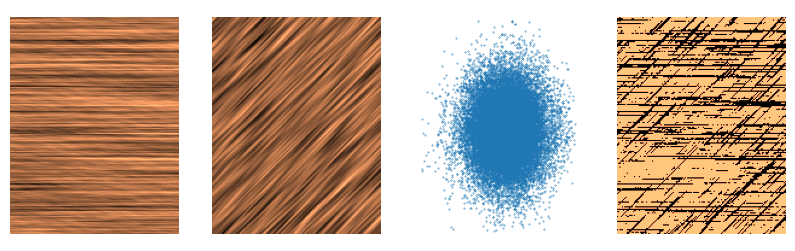

In [11]:
fig, axs = plt.subplots(1, 4,figsize=(10, 3))
axs[0].imshow (field1          , cmap="copper")           ; axs[1].imshow(field2,cmap="copper")
axs[2].scatter(field1.flatten(), field2.flatten(), s=0.1) ; axs[3].imshow(P     ,cmap="copper") ; np.vectorize(lambda ax:ax.axis('off'))(axs); plt.show()

<font color='blue'> **03 ____________________________________________________________________** </font> 

In [12]:
#model1 = gs.Gaussian(dim=dim, var=1, len_scale=[50, 25])        ; srf1 = gs.SRF(model1)     ; field1 = srf1.structured([x, y], seed=20170519)             
model2 = gs.Exponential(dim=dim, var=1, len_scale=[40, 40])      ; srf2 = gs.SRF(model2)     ; field2 = srf2.structured([x, y], seed=19970221)      # len_scale?

In [13]:
M = [200, 200]  ; radius = 25     ; x_lith = np.arange(M[0])   ; y_lith = np.arange(M[1])                     ; lithotypes = np.zeros(M)
MASK = (x_lith[:, np.newaxis] - M[0] // 2) ** 2 + (y_lith[np.newaxis, :] - M[1] // 2) ** 2 < radius**2        ; lithotypes[MASK] = 1    ; pgs = gs.PGS(dim, [field1, field2])  ; P = pgs(lithotypes)

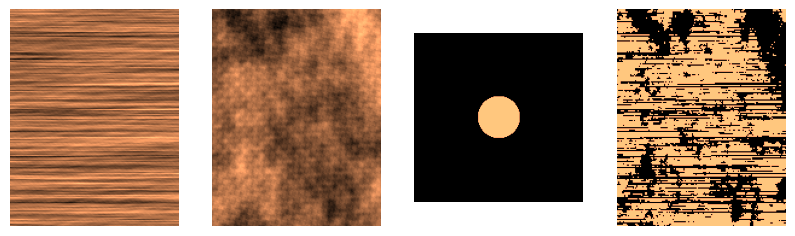

In [14]:
fig, axs = plt.subplots(1, 4,figsize=(10, 3))
axs[0].imshow(field1, cmap="copper", origin="lower") ; axs[1].imshow(field2, cmap="copper", origin="lower")
axs[2].imshow(lithotypes, cmap="copper", origin="lower") ; 
axs[3].imshow(P, cmap="copper", origin="lower") ; np.vectorize(lambda ax:ax.axis('off'))(axs); plt.show()

In [15]:
N=[20,40] ;x,y=range(N[0]),range(N[1]) ; model1=gs.Exponential(dim=2, var=2, len_scale=[10, 1], angles=np.pi / 2)  ;srf1=gs.SRF(model1, seed=20170519) ;field1=srf1.structured([x,y])
field1 = field1.reshape(-1)

print('XY__:',field1.shape, f"  Mean__:{np.mean(field1):.1e}", f"  MED__:{np.median(field1)}",f"  SD__:{np.std(field1):.1e}", f"  MIN__:{np.min(field1)}",f"  MAX__:{np.max(field1)}")

XY__: (800,)   Mean__:3.1e-01   MED__:0.32244939615401874   SD__:1.2e+00   MIN__:-4.685572220522683   MAX__:3.7935593961496084
